In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/students.csv')
display(df.head())

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Hours,Pass,NaN,NaN,NaN,NaN
1,NaN,1,0,NaN,NaN,NaN,NaN
2,NaN,2,0,NaN,NaN,NaN,NaN
3,NaN,3,0,NaN,NaN,NaN,NaN
4,NaN,4,1,NaN,NaN,NaN,NaN


In [ ]:
# Set the first row as the header
df.columns = df.iloc[0]

# Drop the first row
df = df[1:].reset_index(drop=True)

display(df.head())

,NaN,Hours,Pass,NaN,NaN,NaN,NaN
0,NaN,1,0,NaN,NaN,NaN,NaN
1,NaN,2,0,NaN,NaN,NaN,NaN
2,NaN,3,0,NaN,NaN,NaN,NaN
3,NaN,4,1,NaN,NaN,NaN,NaN
4,NaN,5,1,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(axis=1, how='all', inplace=True)
display(df.head())

,Hours,Pass
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1


Here is a step-by-step approach to perform logistic regression on your DataFrame:

In [ ]:
# Step 1: Handle Data Types (Ensure 'Hours' and 'Pass' are numeric)
# Based on previous steps, these columns should now exist.
# Let's convert them to numeric, coercing errors.
df['Hours'] = pd.to_numeric(df['Hours'], errors='coerce')
df['Pass'] = pd.to_numeric(df['Pass'], errors='coerce')

# Check for any missing values introduced by coercion
print("Missing values after numeric conversion:")
display(df.isnull().sum())

# Optionally, handle missing values if any exist after coercion
# For simplicity in this example, we'll drop rows with missing values
df.dropna(inplace=True)

print("\nDataFrame after handling missing values:")
display(df.head())

Missing values after numeric conversion:


,0
0,
Hours,0
Pass,0



DataFrame after handling missing values:


,Hours,Pass
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1


**Step 2: Define Features (X) and Target (y)**

We will use the 'Hours' column as the feature to predict the 'Pass' column.

In [ ]:
X = df[['Hours']] # Features (independent variable)
y = df['Pass']    # Target (dependent variable)

print("Features (X) head:")
display(X.head())
print("\nTarget (y) head:")
display(y.head())

Features (X) head:


,Hours
0,1
1,2
2,3
3,4
4,5



Target (y) head:


,Pass
0,0
1,0
2,0
3,1
4,1


**Step 3: Split the Data**

Split the data into training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (6, 1)
Testing data shape: (2, 1)


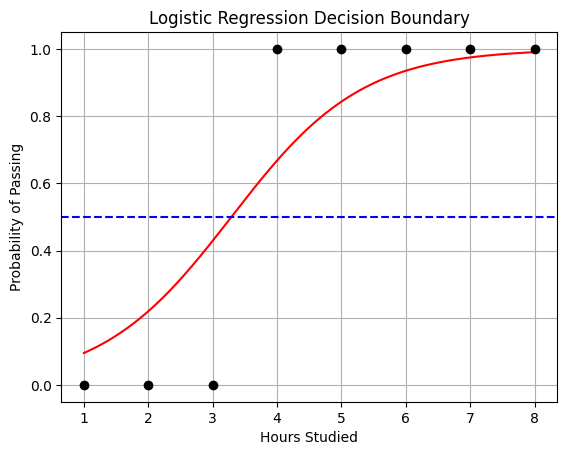

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a range of 'Hours' values to plot the decision boundary
X_plot = np.linspace(X['Hours'].min(), X['Hours'].max(), 300).reshape(-1, 1)

# Convert X_plot to a DataFrame with the correct feature name to avoid the warning
X_plot_df = pd.DataFrame(X_plot, columns=['Hours'])

y_prob = model.predict_proba(X_plot_df)[:, 1]

# Plot the data points
plt.scatter(X['Hours'], y, color='black', zorder=20)

# Plot the predicted probabilities
plt.plot(X_plot, y_prob, color='red')

# Plot the decision boundary (where probability is 0.5)
plt.axhline(y=0.5, color='blue', linestyle='--')

# Add labels and title
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression Decision Boundary')
plt.grid(True)
plt.show()

**Step 4: Initialize and Train the Model**

Initialize the Logistic Regression model and train it on the training data.

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Logistic Regression model trained.")

Logistic Regression model trained.


**Step 5: Make Predictions**

Use the trained model to make predictions on the testing data.

In [ ]:
y_pred = model.predict(X_test)

print("Predictions made on testing data.")
display(y_pred)

Predictions made on testing data.


array([0, 1])

**Step 6: Evaluate the Model**

Evaluate the model's performance using classification report and confusion matrix.

In [ ]:
print("Classification Report:")
display(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
display(confusion_matrix(y_test, y_pred))

Classification Report:


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         1\n           1       1.00      1.00      1.00         1\n\n    accuracy                           1.00         2\n   macro avg       1.00      1.00      1.00         2\nweighted avg       1.00      1.00      1.00         2\n'


Confusion Matrix:


array([[1, 0],
       [0, 1]])